# Stack Overflow Survey Trends

## Project Overview

You work for a staffing agency that specializes in finding qualified candidates for development roles. One of your latest clients is growing rapidly and wants to understand what kinds of developers they can hire, and to understand general trends of the technology market. Your organization has access to this Stack Overflow dataset, which consists of survey responses by developers all over the world for the last few years.

Your project is to put together several statistical analyses about the community to educate your client about the potential hiring market for their company.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

## Explore data

In [2]:
df = pd.read_csv(r'C:\Users\JaimeGGB\Downloads/stackoverflow-survey-data-analysis/developer_dataset.csv')
print(df.columns)
print(len(df.columns))

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')
21


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [4]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


In [5]:
df.dtypes

RespondentID                int64
Year                        int64
Country                    object
Employment                 object
UndergradMajor             object
DevType                    object
LanguageWorkedWith         object
LanguageDesireNextYear     object
DatabaseWorkedWith         object
DatabaseDesireNextYear     object
PlatformWorkedWith         object
PlatformDesireNextYear     object
Hobbyist                   object
OrgSize                    object
YearsCodePro              float64
JobSeek                    object
ConvertedComp             float64
WorkWeekHrs               float64
NEWJobHunt                 object
NEWJobHuntResearch         object
NEWLearn                   object
dtype: object

In [6]:
df.head()

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


Some initial interesting questions we could answer with this data: 
- Where do respondents live? (pie chart)
- What percentage are employed, not employed, etc? (pie chart)
- Undergrad major? (pie chart)
- DevType? (pie chart)
- Languages worked with? (pie chart)
- Languages desired? (pie chart)
- Databases worked with? (pie chart)
- Databases desired? (pie chart)
- Hobbyist? (Pie chart)
...
- Converted comp? (Histogram)
- Work week hours? (Histogram)

Then client could ask for specifics, like: out the people who are not employed/fully available for hire, how many desire to work with Python for example?

## Delete highly missing data

You can safely remove columns with more than ~60% missing data

In [7]:
non_null_counts = df.notna().sum()
perc = (1 - (non_null_counts / max(non_null_counts))) * 100
print(perc)
colstodrop = perc.index[perc > 60]
df.drop(columns=colstodrop, inplace=True)
len(df.columns)

RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


18

## Analyze developers by country

We will analyzee Employment and DevType by country. What type of missing data do the Employment and Devtype columns have? MCAR, MAR, Structurally Missing, MNAR?
- Structurally missing data - blank spaces were left on purpose, look at other columns for clues as to why
- MCAR - Missing completely at random - data is not missing because a specific group of people decided not to answer the survey, - due to human error when inputting data many times. Use groupBy to find out.
- MAR - Missing at random - data is missing because a specific group of people decided not to answer survey (perhaps fat people did not share their weight). We say at random because out of the fat people, the probability of any one fat person not providing their weight is random. Use groupBy to find out.
- MNAR - Missing not at random - it was due to a specific event, such as: the researches did not have a scale to take weights on one specific date because they had no batteries

Do developers from certain countries have a larger PROPORTION of missing Employment data? Do developers from certain countries have a larger PROPORTION of missing DevType data?

In [8]:
missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()
missingData

,Country,Employment,DevType
0,Canada,148,944
1,China,139,491
2,France,104,848
3,Germany,386,1691
4,Japan,13,109
5,Mexico,25,207
6,Spain,74,434
7,United Kingdom,196,1472
8,United States,699,4580


In [9]:
missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).mean().reset_index()
missingData[['Employment', 'DevType']] = (missingData[['Employment', 'DevType']] * 100).round(0)
print('Proportion of missing data by country (%):')
print(missingData)

Proportion of missing data by country (%):
          Country  Employment  DevType
0          Canada         2.0     11.0
1           China         7.0     24.0
2          France         2.0     12.0
3         Germany         2.0     10.0
4           Japan         1.0     10.0
5          Mexico         1.0     11.0
6           Spain         2.0     10.0
7  United Kingdom         1.0      9.0
8   United States         1.0      9.0


In [10]:
missingData = df[['Employment','DevType']].notnull().groupby(df['Country']).mean().reset_index()
missingData[['Employment', 'DevType']] = (missingData[['Employment', 'DevType']] * 100).round(0)
print('Proportion of data NOT missing by country (%):')
print(missingData)

Proportion of data NOT missing by country (%):
          Country  Employment  DevType
0          Canada        98.0     89.0
1           China        93.0     76.0
2          France        98.0     88.0
3         Germany        98.0     90.0
4           Japan        99.0     90.0
5          Mexico        99.0     89.0
6           Spain        98.0     90.0
7  United Kingdom        99.0     91.0
8   United States        99.0     91.0


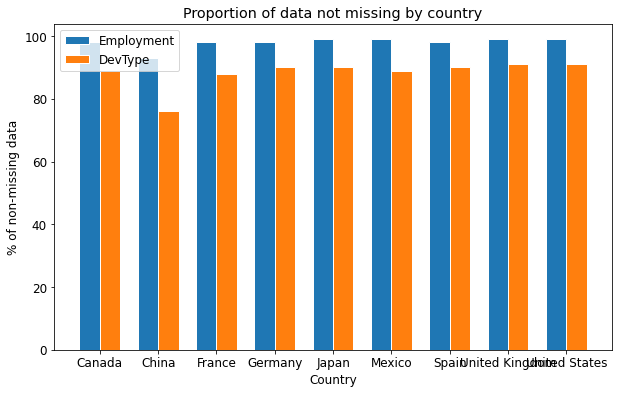

In [11]:
import matplotlib.pyplot as plt

# Set the figure size and font size
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 12})

# Define the data
countries = missingData['Country']
employment = missingData['Employment']
devtype = missingData['DevType']

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(countries))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, employment, color='tab:blue', width=bar_width, edgecolor='white', label='Employment')
plt.bar(r2, devtype, color='tab:orange', width=bar_width, edgecolor='white', label='DevType')

# Add x-axis ticks and labels
plt.xticks([r + bar_width/2 for r in r1], countries)

# Add axis labels and title
plt.ylabel('% of non-missing data')
plt.xlabel('Country')
plt.title('Proportion of data not missing by country')

# Add a legend
plt.legend()

# Display the chart
plt.show()

In [12]:
missingData = df[['Employment','DevType']].notnull().groupby(df['Year']).mean().reset_index()
missingData[['Employment', 'DevType']] = (missingData[['Employment', 'DevType']] * 100).round(0)
print('Proportion of data NOT missing by Year (%):')
print(missingData)

Proportion of data NOT missing by Year (%):
   Year  Employment  DevType
0  2018        98.0     95.0
1  2019        98.0     92.0
2  2020       100.0     81.0


In [13]:
missingData = df[['Country','DevType']].notnull().groupby(df['Employment']).mean().reset_index()
missingData[['Country','DevType']] = (missingData[['Country','DevType']] * 100).round(0)
print('Proportion of data NOT missing by Year (%):')
print(missingData)

Proportion of data NOT missing by Year (%):
                                          Employment  Country  DevType
0                                 Employed full-time    100.0     96.0
1                                 Employed part-time    100.0     94.0
2  Independent contractor, freelancer, or self-em...    100.0     96.0
3             Not employed, and not looking for work    100.0     47.0
4                 Not employed, but looking for work    100.0     94.0
5                                            Retired    100.0     22.0
6                                            Student    100.0      0.0


It seems people who answered "Retired", "No employed, not looking for work" and "Student" left the DevType column missing because perhaps they felt they did not belong to the community and felt less motivated to answer the questions, or did not really know what developer type category to put themselves into. This could be considered Missing At Random.

In [14]:
missingData = df[['Country','Employment']].notnull().groupby(df['DevType']).mean().reset_index()
missingData[['Country','Employment']] = (missingData[['Country','Employment']]  * 100).round(0)
missingData = missingData.sort_values('Employment', ascending=False)
print('Proportion of data NOT missing by Year (%):')
print(missingData)

Proportion of data NOT missing by Year (%):
                                                 DevType  Country  Employment
0                                    Academic researcher    100.0       100.0
10397  Database administrator;Developer, back-end;Dev...    100.0       100.0
10369  Database administrator;Developer, back-end;Dev...    100.0       100.0
10370  Database administrator;Developer, back-end;Dev...    100.0       100.0
10371  Database administrator;Developer, back-end;Dev...    100.0       100.0
...                                                  ...      ...         ...
15314  Educator or academic researcher;Front-end deve...    100.0         0.0
12588  Desktop or enterprise applications developer;G...    100.0         0.0
11235  Designer;Desktop or enterprise applications de...    100.0         0.0
9164   Database administrator;Designer;Desktop or ent...    100.0         0.0
9079   Data scientist or machine learning specialist;...    100.0         0.0

[15627 rows x 3 col

This groupBy does not give us a useful insight as there are too many developer types. We should group DevType into front-end, back-end, full-stack, mobile and admin. We'll do that later.

So what type of missing data is it?
- Structurally missing? No. No values were left blank on purpose by respondents because answer may be implicit from another column.
- MAR? No. Missing data is not missing because a specific subset of people decided not to answer a part of the survey. You could argue that the Chinese developers were less likely to answer questions, but the other countries have missing data as well.
- MCAR? Yes. Missing data is not missing because a specific subset of people decided not to answer a part of the survey. You could argue that the Chinese developers were less likely to answer questions, but the other countries have missing data as well.
- MNAR? No. Missing data is not missing due to a specific event. You could argue that in 2020, developers were less likely to answer the DevType question. This could be due to the survey format / how the questions were presented that year, or due to roles becoming more ambiguous in developer market, making it harder to answer the question. We would have to ask researchers about this to be sure.

Since the data is MCAR, we can drop any rows with missing data for either DevType or Employment column.

In [15]:
df.dropna(subset=['Employment','DevType'], inplace= True)
df.reset_index(drop= True)

missingData = df[['Employment','DevType']].notnull().groupby(df['Country']).mean().reset_index()
missingData[['Employment', 'DevType']] = (missingData[['Employment', 'DevType']] * 100).round(0)
print('Proportion of data NOT missing by country (%):')
print(missingData)

Proportion of data NOT missing by country (%):
          Country  Employment  DevType
0          Canada       100.0    100.0
1           China       100.0    100.0
2          France       100.0    100.0
3         Germany       100.0    100.0
4           Japan       100.0    100.0
5          Mexico       100.0    100.0
6           Spain       100.0    100.0
7  United Kingdom       100.0    100.0
8   United States       100.0    100.0


We can now plot some graphs to see information visually

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


         Country                                            DevType BackEnd  \
0  United States           Engineering manager;Full-stack developer     NaN   
1  United States                              Developer, full-stack     NaN   
3  United States                               Full-stack developer     NaN   
4  United States  Data or business analyst;Database administrato...    True   
5  United States  Developer, back-end;Developer, desktop or ente...    True   

  FrontEnd FullStack Mobile Admin  
0      NaN       NaN    NaN   NaN  
1      NaN      True    NaN   NaN  
3      NaN       NaN    NaN   NaN  
4     True      True   True  True  
5      NaN       NaN    NaN   NaN  
         Country   DevCat DevFlag
0  United States  BackEnd     NaN
1  United States  BackEnd     NaN
2  United States  BackEnd     NaN
3  United States  BackEnd    True
4  United States  BackEnd    True
         Country   DevCat DevFlag
0  United States  BackEnd    True
1  United States  BackEnd    True
2  

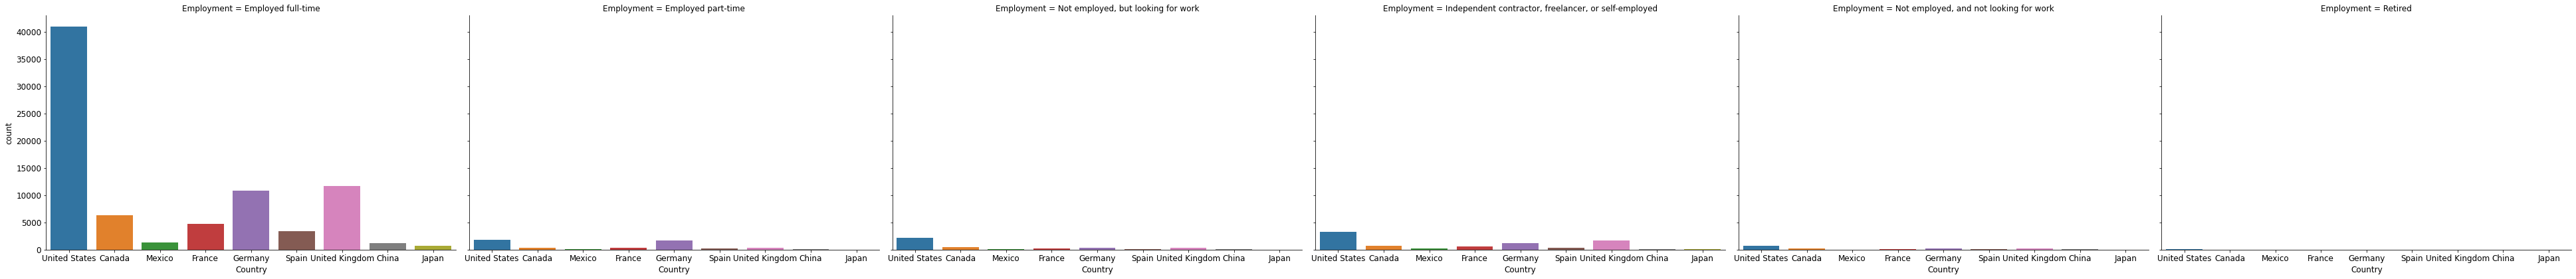

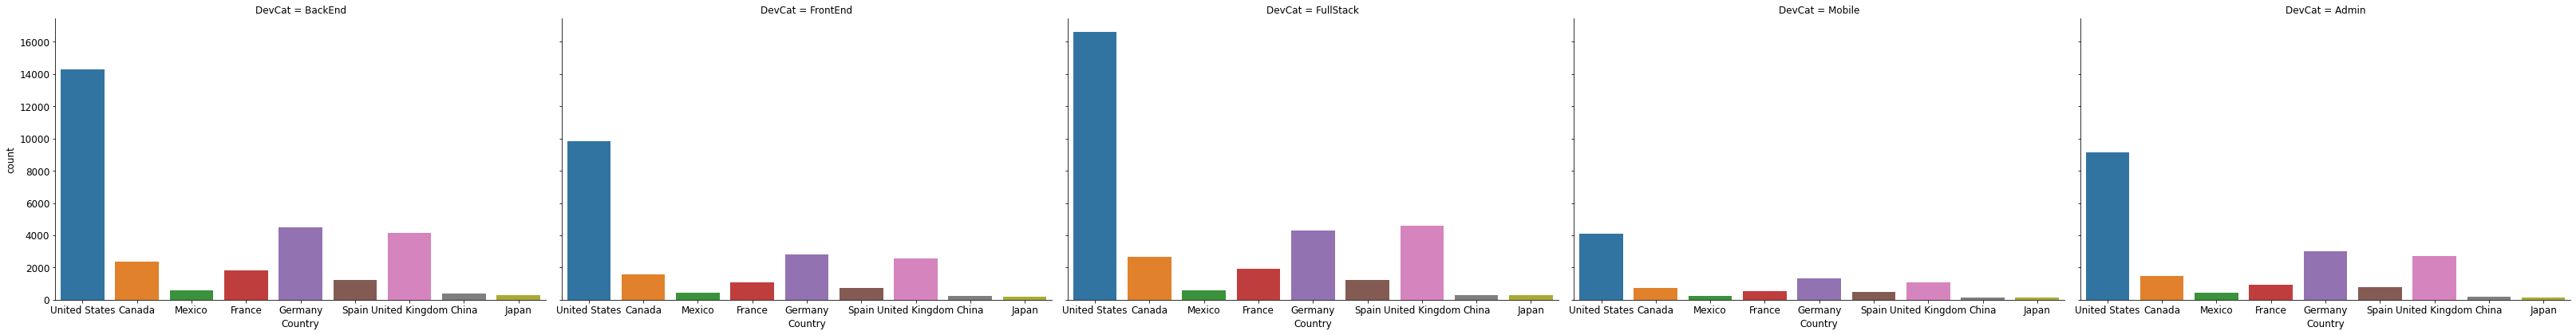

In [16]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);
 
# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

print(devdf.head())
 
devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')

print(devdf.head())
 
devdf.dropna(how='any', inplace=True)
devdf = devdf.reset_index(drop=True)

print(devdf.head())
 
devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);

## Investigate developer undergraduate majors

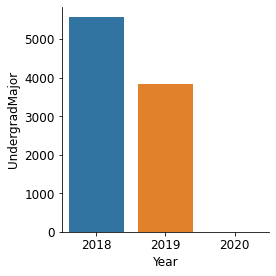

In [17]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()
 
sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

In [18]:
# Sort by ID and Year so that each person's data is carried backwards correctly
df = df.sort_values(['RespondentID','Year'])
 
df['UndergradMajor'].bfill(axis=0, inplace=True)
df[['RespondentID','Year','UndergradMajor']].head(15)

,RespondentID,Year,UndergradMajor
0,1,2018,"Computer science, computer engineering, or sof..."
1,1,2019,"Computer science, computer engineering, or sof..."
3,2,2018,"Computer science, computer engineering, or sof..."
4,2,2019,"Computer science, computer engineering, or sof..."
5,2,2020,"Computer science, computer engineering, or sof..."
6,3,2018,"Computer science, computer engineering, or sof..."
7,3,2019,"Computer science, computer engineering, or sof..."
8,3,2020,"Computer science, computer engineering, or sof..."
9,4,2018,Fine arts or performing arts (ex. graphic desi...
10,4,2019,"Information systems, information technology, o..."


C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

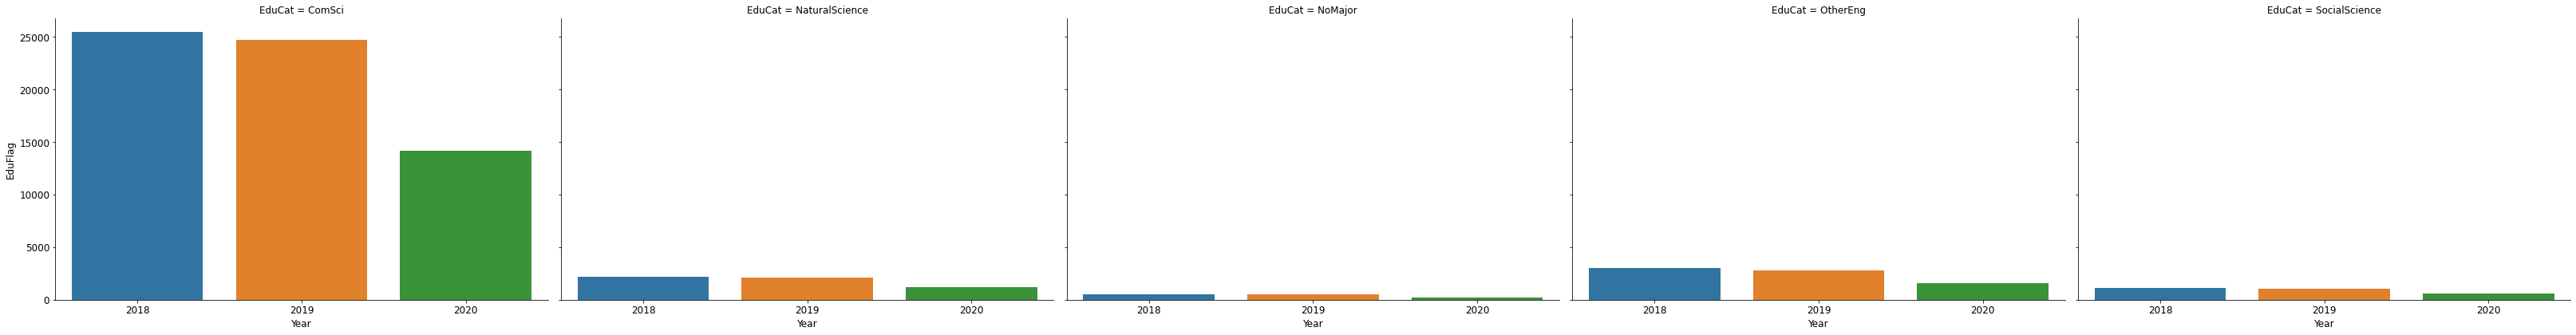

In [19]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
# Now create new columns with Trues and Falses
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

# Melt the wide dataframe into a narrow dataframe, putting all majors categories in a single column, 'EduCat', 
# followed by a column that says True or False (did that guy study that major that year? True)
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()
 
eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

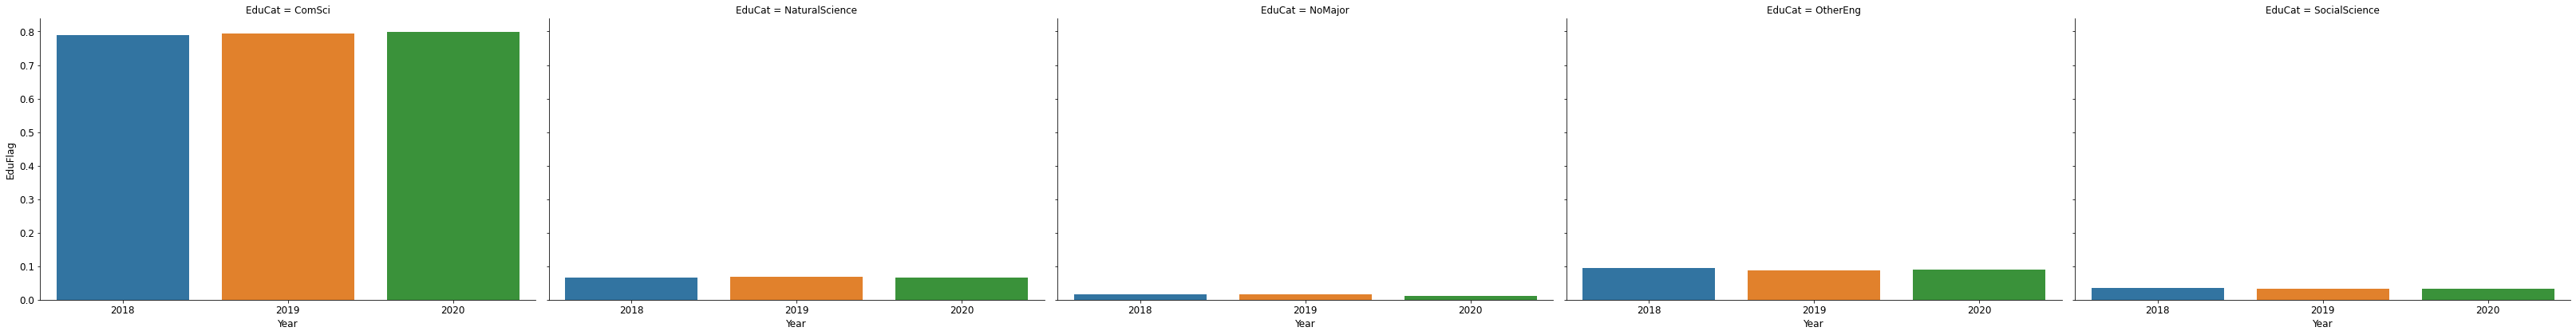

In [20]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']
 
edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
# Now create new columns with Trues and Falses
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

# Melt the wide dataframe into a narrow dataframe, putting all majors categories in a single column, 'EduCat', 
# followed by a column that says True or False (did that guy study that major that year? True)
edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat'])['EduFlag'].sum().reset_index()

# Now calculate the total count of people who reported their education category each year
total_count = edudf.groupby('Year')['EduFlag'].sum()

# Divide the count of each category by the total count of people who reported their education category that year
edudf['EduFlag'] = edudf.apply(lambda x: x['EduFlag'] / total_count[x['Year']], axis=1)

eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);


Insights:
- Unsuprisingly, most people in the survey studied computer science
- The reason 2020 has fewer data for all majors is because 2020 had many fewer responders to the survey. In fact, when we look at the graph of percentage of responders with computer science major by Year, we see that that percentage increased over time, more developers come from computer science than before. We don't know why fewer people responded that year, we could ask stack overflow if they know why (they could have sent the survey to fewer people, or the pandemic may have demotivated people to take part in surveys)

## Examine the relationship between years of experience and compensation

        Year  YearsCodePro  ConvertedComp
0       2018           NaN       141000.0
1       2019           1.0        61000.0
3       2018           4.0        48000.0
4       2019           8.0        90000.0
5       2020          13.0       116000.0
...      ...           ...            ...
111187  2018           NaN        93000.0
111188  2018           NaN       116000.0
111190  2018           NaN         8000.0
111191  2018           NaN        71000.0
111198  2018           1.0       144000.0

[99975 rows x 3 columns]


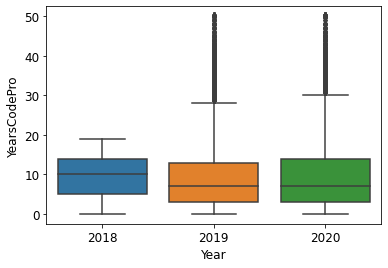

In [21]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]
print(compFields)
 
D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)

<function matplotlib.pyplot.show(close=None, block=None)>

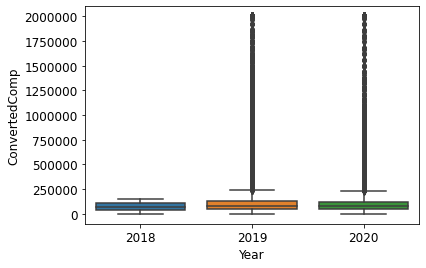

In [22]:
# create the boxplot
E = sns.boxplot(x="Year", y="ConvertedComp", data=compFields)

# get the y-axis object
y_axis = E.axes.yaxis

# create a scalar formatter without scientific notation
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
formatter.set_powerlimits((-6,6))

# set the y-axis tick labels to use the new formatter
y_axis.set_major_formatter(formatter)

# show the plot
plt.show


The distribution of YearsCodePro and ConvertedComp is similar across different years in the data set. This suggests that the relationship between YearsCodePro and ConvertedComp is stable over time

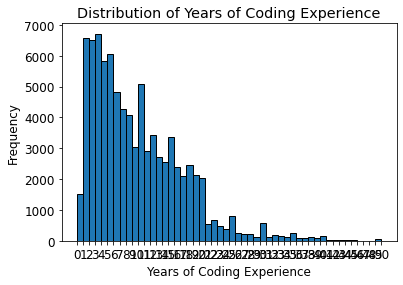

In [23]:
import matplotlib.pyplot as plt

imputedf = df[['YearsCodePro','ConvertedComp']]
years = imputedf['YearsCodePro']

plt.hist(years, bins=range(0, 51, 1), edgecolor='black')
plt.xticks(range(0, 51, 1))
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Coding Experience')
plt.show()


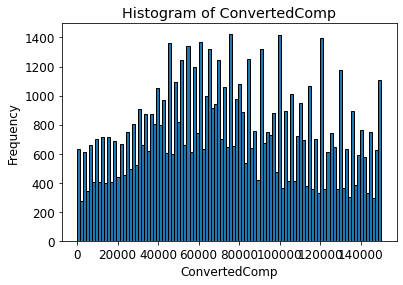

In [24]:
imputedf = imputedf.loc[imputedf['ConvertedComp'] <= 150000]

imputedf['ConvertedComp'].plot.hist(bins=100, edgecolor='black')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedComp')
plt.show()

In [25]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputedf = df[['YearsCodePro','ConvertedComp']]
imputedf = imputedf.reset_index(drop= True)
print(imputedf[imputedf['ConvertedComp'].isna()])
print(len(imputedf))

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(imputedf)
compdf = pd.DataFrame(np.round(imp.transform(imputedf),3), columns=['YearsCodePro','ConvertedComp'])

print(compdf[imputedf['ConvertedComp'].isna()])

# Note: It is still an open problem as to how useful single vs. multiple imputation is in the context of 
# prediction and classification when the user is not interested in measuring uncertainty due to missing values.
# Since we are not measuring/evaluating uncertainty due to missing values, we don't need a training and test set.

       YearsCodePro  ConvertedComp
5               1.0            NaN
11              NaN            NaN
20              9.0            NaN
22              NaN            NaN
23              0.0            NaN
...             ...            ...
99953          16.0            NaN
99955           0.0            NaN
99961           NaN            NaN
99963          11.0            NaN
99965           NaN            NaN

[16659 rows x 2 columns]
99975
       YearsCodePro  ConvertedComp
5             1.000     119912.957
11            9.498     129224.805
20            9.000     128679.602
22            9.498     129224.805
23            0.000     118817.126
...             ...            ...
99953        16.000     136350.417
99955         0.000     118817.126
99961         9.498     129224.805
99963        11.000     130871.263
99965         9.498     129224.805

[16659 rows x 2 columns]


In [33]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
 
imputedf = df[['YearsCodePro','ConvertedComp']]
 
traindf, testdf = train_test_split(imputedf)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the ENTIRE dataset (train and test are in case you need to evaluate imputation results)
imp.fit(imputedf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

C:\Users\JaimeGGB\AppData\Local\Temp/ipykernel_20420/2851799836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<AxesSubplot:xlabel='CodeYearBins', ylabel='ConvertedComp'>

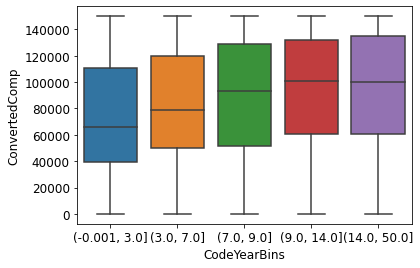

In [34]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(-0.001, 3.0]'),
  Text(1, 0, '(3.0, 5.0]'),
  Text(2, 0, '(5.0, 10.0]'),
  Text(3, 0, '(10.0, 15.0]'),
  Text(4, 0, '(15.0, 50.0]')])

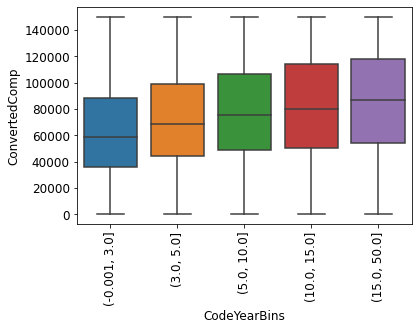

In [35]:
Deletiondf = df[['YearsCodePro', 'ConvertedComp']].dropna()
Deletiondf = Deletiondf.loc[Deletiondf['ConvertedComp'] <= 150000]
Deletiondf['CodeYearBins'] = pd.qcut(Deletiondf['YearsCodePro'], q=5)
 
sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=Deletiondf)
plt.xticks(rotation=90)

Note: In this particular case, deletion seems like a better choice than imputation. Imputation seems to be inflating compensation at 9 years of experience (imputation is predicting practically all missing years of experience as 9, and all compensation values as about 130,000 USD).

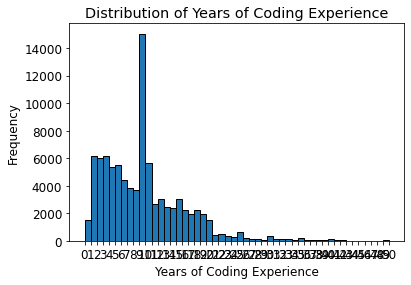

In [36]:
years = compPlotdf['YearsCodePro']

plt.hist(years, bins=range(0, 51, 1), edgecolor='black')
plt.xticks(range(0, 51, 1))
plt.xlabel('Years of Coding Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Years of Coding Experience')
plt.show()

In [ ]:
compPlotdf['ConvertedComp'].plot.hist(bins=100, edgecolor='black')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.title('Histogram of ConvertedComp')
plt.show()

I trust the dataframe in which I deleted missing rows more than the dataframe in which I imputed missing values.